# Fonction normale

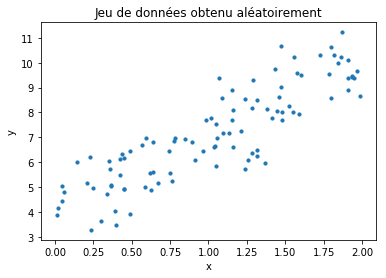

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


plt.scatter(X,y,s=10)
plt.title('Jeu de données obtenu aléatoirement')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
X_b = np.c_[np.ones((100, 1)), X] # ajouter x0 = 1 à chaque observation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.10249127]
 [2.94055528]]


## Prédictions

In [14]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ajouter x0 = 1 à chaque obs.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.10249127],
       [9.98360183]])

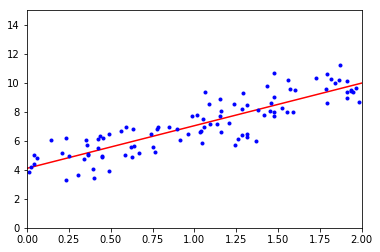

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## même mais pour sk-learn

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
values = lin_reg.intercept_, lin_reg.coef_
print(values)
lin_reg.predict(X_new)

(array([4.10249127]), array([[2.94055528]]))


array([[4.10249127],
       [9.98360183]])